## File used to process the VCTK files

Need to make sure that the *following* files are in in the directory:

- DataProcessing.py
- config.yml
- process.py (optional)
- utils.py

NOTE: from DataProcessing.py change `from data_processing.utils import *` to `from utils import *`.

config.yml contents:



```
# Data.
dataset:
    train-clean-100: "librispeech/downloads/extracted/TAR_GZ.openslr.org_resource_12_train-clean-1001N3R1aarMDBm8Ulx12juQyeKXyoKpD3HFrDmTsu79uI.tar.gz/LibriSpeech/train-clean-100"
    train-clean-360: "librispeech/downloads/extracted/TAR_GZ.openslr.org_resource_12_train-clean-360FGpWSWIX6WwUM0oWDfl__-3W4KBOZrnFrw1Avjx5Ls8.tar.gz.incomplete_419af91646134b46a332a6d1f38e0261/LibriSpeech/train-clean-360"
    train-clean-500: "librispeech/downloads/extracted/TAR_GZ.openslr.org_resource_12_train-other-5003bIvJ_luwWNkXVMhVVnfaqNlFfJuAd1weYGINQrcttI.tar.gz.incomplete_4fa7adaee06441e9b95cf97e93617ee2/LibriSpeech/train-other-500"
    dev-clean: "librispeech/downloads/extracted/TAR_GZ.openslr.org_resources_12_dev-cleandvh9CQZQYX_KDKyPiLlBbg6_gDUKy5ezQ6hfqQNyirM.tar.gz/LibriSpeech/dev-clean"
    test-clean: "librispeech/downloads/extracted/TAR_GZ.openslr.org_resources_12_test-cleanOf3lJeWWctxtFVGRmxR49yRDipWqVfh0tXa-IZZ-bCM.tar.gz/LibriSpeech/test-clean"
    vctk: "vctk/mic1/1.0.0"

# Paths.
write_path: "processed_datasets"
base_read_path: "processed_datasets"
bucket_name: "DataSet"

dataset_tf: "vctk"  # The dataset to process ["librispeech", "vctk"]
subdataset: "vctk"

# Processing variables.
nfft: 1024
window: 512 # Not yet sure what this should be
stride: 256
rate: 16000
mels: 80
fmin: 125
fmax: 7600

```



In [1]:
! pip install -q tensorflow-io

In [2]:
from google.colab import auth
import tensorflow_io as tfio # ! pip install -q tensorflow-io
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm 
import importlib

import yaml
from pathlib import Path

In [3]:
auth.authenticate_user()

In [4]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  90607      0 --:--:-- --:--:-- --:--:-- 90607
OK
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.35.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [5]:
!mkdir DataSet
!gcsfuse autovc_datasets DataSet

mkdir: cannot create directory ‘DataSet’: File exists
2021/04/28 11:29:37.111003 Using mount point: /content/DataSet
2021/04/28 11:29:37.119704 Opening GCS connection...
2021/04/28 11:29:37.584943 Mounting file system "autovc_datasets"...
2021/04/28 11:29:37.585864 File system has been successfully mounted.


In [17]:
import DataProcessing as dp

In [18]:
importlib.reload(dp)

<module 'DataProcessing' from '/content/DataProcessing.py'>

In [8]:
config = yaml.load(Path("config.yml").read_text(), Loader=yaml.SafeLoader)

# Processing and writing VCTK files

In [10]:
bucket_name = config["bucket_name"]  # Name of how bucket is mounted
datasets = [] # empty for vctk since there is just one
writer = dp.DataWriter(bucket_name, datasets, config)

In [ ]:
writer.process_datasets()

# Reading VCTK files

In [19]:
reader = dp.DataReader(config)
reader.load_datasets()

In [20]:
datasets = reader.get_datasets()
dataset = datasets["DataSet/processed_datasets/vctk/tfrecord-00303-of-00512"]

An example of the VCTK dataset looks as follows:



```
{
  'accent': <tf.Tensor: shape=(), dtype=int64, numpy=6>, 
  'gender': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 
  'id': <tf.Tensor: shape=(), dtype=string, numpy=b'p283_204'>, 
  'speaker': <tf.Tensor: shape=(), dtype=int64, numpy=56>, 
  'speech': <tf.Tensor: shape=(1,), dtype=string, numpy=array[b'\x08\x01\x12\t'], dtype=object)>
}

```



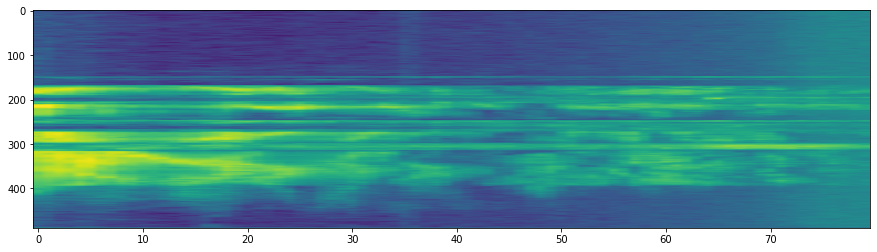

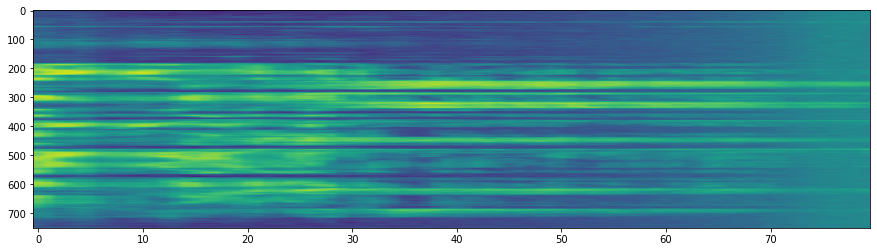

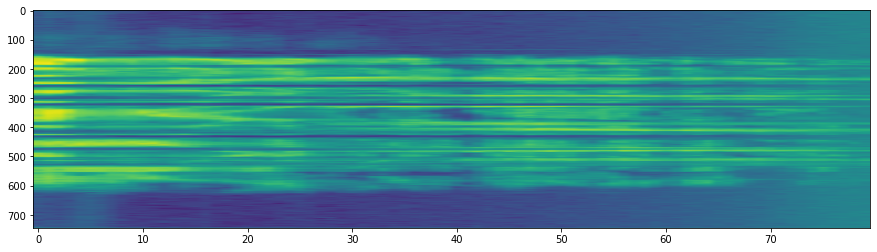

In [35]:
for example in dataset.take(3):

  # Parse the specgrogram (binary -> tensor)
  example = parse_spectrograms_vctk(example)

  # Plot spectrogram
  tensor = example["speech"]
  plt.figure(figsize=(15,4))
  data = tf.math.log(tensor).numpy()
  plt.imshow(data, aspect="auto")
  plt.show()

